Modelling and Evaluation Notebook

Objectives

Answer business requirement 2
The client is interested to tell whether a given cell contains a healthy leaf or a powderly_mildew


Inputs
inputs/cherry-leaves_datasets/cherry-leaves/train
inputs/cherry-leaves_datasets/cherry-leaves/test
inputs/cherry-leaves_datasets/cherry-leaves/validation
image shape embeddings


Outputs
Images distribution plot in train, validation and test sets
Image augmentation
Class indices to change prediction inference in labels 
Machine learning model creation and training
Save model
Learning curve plot for model performance 
Model evaluation on pickle file
Prediction on the random image file

In [36]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

In [37]:
cwd= os.getcwd()

In [38]:
os.chdir('c:/python_projects/project_5/jupyter_notebooks')
print("You set a new current directory")

You set a new current directory


In [39]:
current_dir = os.getcwd()
current_dir

'c:\\python_projects\\project_5\\jupyter_notebooks'

In [40]:
my_data_dir='inputs/cherry-leaves_dataset/cherry-leaves'
train_path=my_data_dir +'/train'
validation_path=my_data_dir + '/validation'
test_path=my_data_dir + '/test'

In [41]:
print(f"Train path: {train_path}")
print(f"Labels: {labels}")

Train path: inputs/cherry-leaves_dataset/cherry-leaves/train
Labels: ['healthy', 'powdery_mildew']


In [42]:
import os
print("Current working directory:", os.getcwd())

Current working directory: c:\python_projects\project_5\jupyter_notebooks


In [43]:
import os
my_data_dir='inputs/cherry-leaves_dataset/cherry-leaves'
train_path=my_data_dir +'/train'
train_path = '../inputs/cherry-leaves_dataset/cherry-leaves/train'
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['healthy', 'powdery_mildew']


In [44]:
version='v1'
file_path=f'outputs/{version}'
if os.path.exists(file_path):
    print('Old version is already available. Create a new version if needed.')
else:
    os.makedirs(file_path)
    print(f'Created new folder: {file_path}')
    


Old version is already available. Create a new version if needed.


In [45]:
train_path = '../inputs/cherry-leaves_dataset/cherry-leaves/train'

labels = ['healthy', 'powdery_mildew']

In [48]:
## Import saved image shape embedding
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"../outputs/v1/image_shape.pkl")
image_shape

(256, 256, 3)

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images




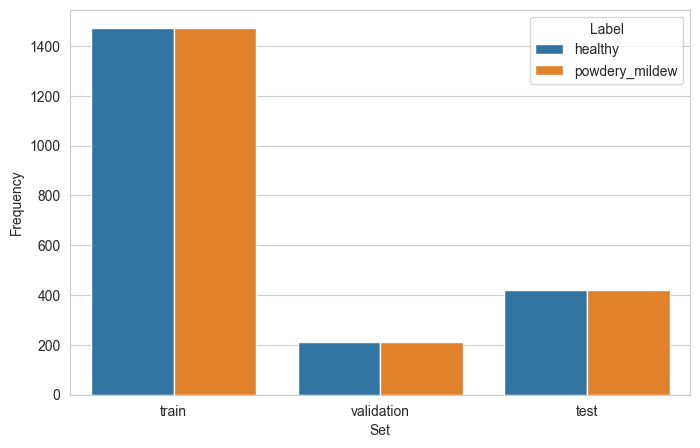

In [49]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

my_data_dir = '../inputs/cherry-leaves_dataset/cherry-leaves'
labels = ['healthy', 'powdery_mildew']
folders = ['train', 'validation', 'test']

# Create an empty dictionary
data = {
    'Set': [],
    'Label': [],
    'Frequency': []
}

# Loop to dynamically create and append rows
for folder in folders:
    for label in labels:
        label_path = os.path.join(my_data_dir, folder, label)
        if os.path.exists(label_path):
            frequency = len(os.listdir(label_path))
            print(f"* {folder} - {label}: {frequency} images")
            row = {
                'Set': folder,
                'Label': label,
                'Frequency': frequency
            }
            for key, value in row.items():
                data[key].append(value)
        else:
            print(f" Folder not found: {label_path}")

# Convert the dictionary to a DataFrame
df_freq = pd.DataFrame(data)

print("\n")
# Plotting
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png',bbox_inches='tight',dpi=150)

plt.show()

Image data augmentation 


ImageDataGenerator 


In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Initialize ImageDataGenerator

In [51]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                        width_shift_range=0.10,
                                        height_shift_range=0.10,
                                        shear_range=0.1,
                                        zoom_range=0.1,
                                        horizontal_flip=True,
                                        vertical_flip=True,
                                        fill_mode='nearest',
                                        rescale=1./255
                                        )

In [52]:

batch_size = 20  # Set batch size
train_set = augmented_image_data.flow_from_directory(train_path,
                                                    target_size=image_shape[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    shuffle=True
                                                    )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

In [53]:
validation_path = '../inputs/cherry-leaves_dataset/cherry-leaves/validation'
test_path='../inputs/cherry-leaves_dataset/cherry-leaves/test'

In [54]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(validation_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='binary',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

In [ ]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                target_size=image_shape[:2],
                                                                color_mode='rgb',
                                                                batch_size=batch_size,
                                                                class_mode='binary',
                                                                shuffle=False
                                                                )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

Plot augmented training image

(20, 256, 256, 3)


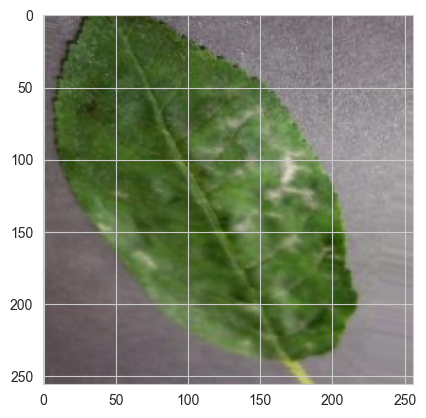

(20, 256, 256, 3)


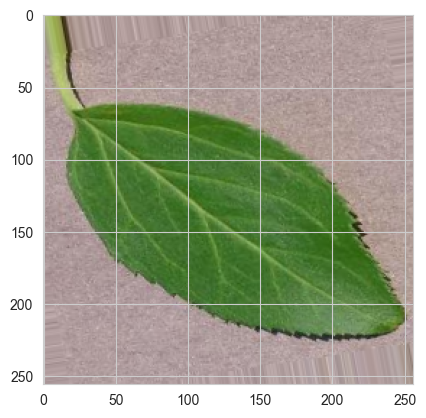

(20, 256, 256, 3)


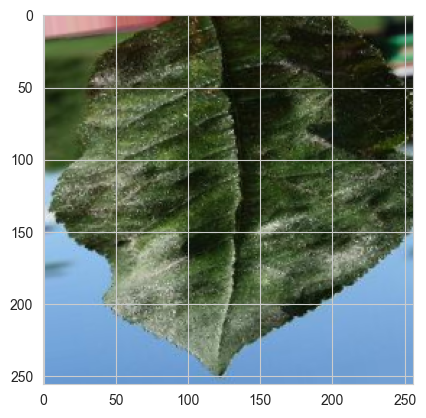

In [55]:
import matplotlib.pyplot as plt
for _ in range(3):
    img, label = next(train_set)
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

Plot augmented validation image

(20, 256, 256, 3)


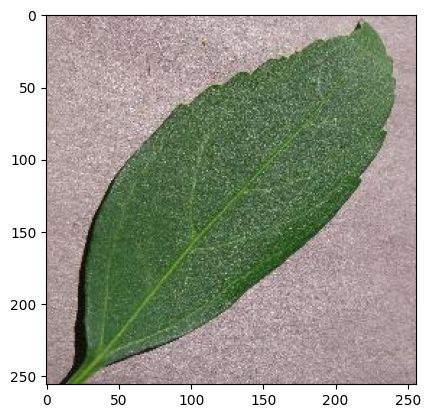

(20, 256, 256, 3)


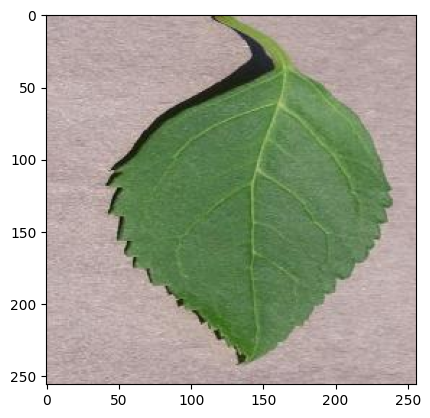

(20, 256, 256, 3)


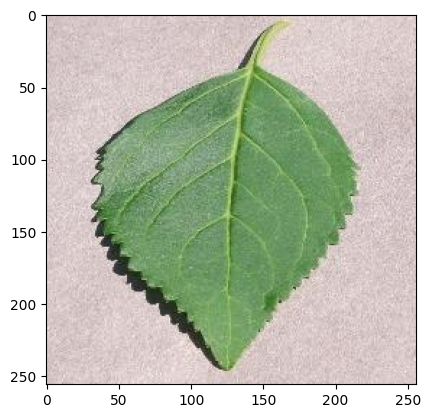

In [ ]:
for _ in range(3):
    img, label = next(validation_set)
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

Plot augmented test image

(20, 256, 256, 3)


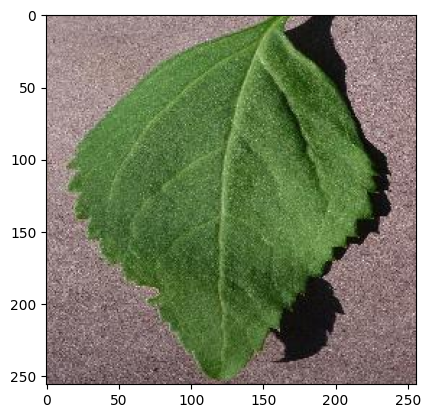

(20, 256, 256, 3)


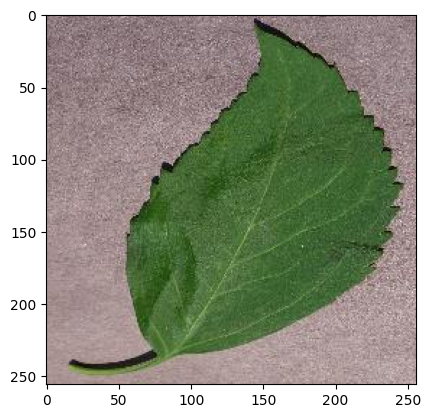

(20, 256, 256, 3)


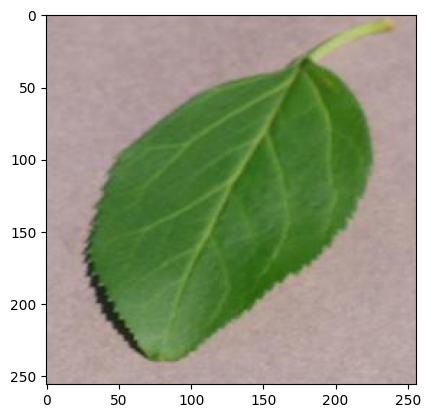

In [ ]:
for _ in range(3):
    img, label = next(test_set)
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

Save class_indices

In [56]:
file_path=f'outputs/{version}'
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

Model Creation

ML model

Import model packages

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

Model

In [58]:
def create_tf_model():
        model = Sequential()

        model.add(Conv2D(filters=32, kernel_size=(3, 3),
                input_shape=image_shape, activation='relu', ))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(filters=64, kernel_size=(3, 3),
                input_shape=image_shape, activation='relu', ))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(filters=64, kernel_size=(3, 3),
                input_shape=image_shape, activation='relu', ))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Flatten())
        model.add(Dense(128, activation='relu'))

        model.add(Dropout(0.5))
        model.add(Dense(1, activation='sigmoid'))

        model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

        return model

Model Summary

In [59]:
create_tf_model().summary()

C:\Users\omer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,429,377 (28.34 MB)

 Trainable params: 7,429,377 (28.34 MB)

 Non-trainable params: 0 (0.00 B)

Early Stopping

In [60]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

Fit model for model training

In [61]:
model = create_tf_model()
model.fit(train_set,
        epochs=25,
          steps_per_epoch=len(train_set.classes) // batch_size,
        validation_data=validation_set,
        callbacks=[early_stop],
        verbose=1
        )

C:\Users\omer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 117s 766ms/step - accuracy: 0.7511 - loss: 0.5050 - val_accuracy: 0.8881 - val_loss: 0.2218
Epoch 2/25
  1/147 ━━━━━━━━━━━━━━━━━━━━ 58s 404ms/step - accuracy: 1.0000 - loss: 0.0469

C:\Users\omer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 1.0000 - loss: 0.0469 - val_accuracy: 0.8214 - val_loss: 0.4068
Epoch 3/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 105s 714ms/step - accuracy: 0.9585 - loss: 0.1385 - val_accuracy: 0.9976 - val_loss: 0.0075
Epoch 4/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 1.0000 - loss: 0.0115 - val_accuracy: 0.9976 - val_loss: 0.0062
Epoch 5/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 105s 712ms/step - accuracy: 0.9955 - loss: 0.0169 - val_accuracy: 0.9976 - val_loss: 0.0101
Epoch 6/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9976 - val_loss: 0.0054
Epoch 7/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 104s 707ms/step - accuracy: 0.9758 - loss: 0.0690 - val_accuracy: 0.9976 - val_loss: 0.0098
Epoch 8/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 1.0000 - loss: 0.0388 - val_accuracy: 0.9976 - val_loss: 0.0108
Epoch 9/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 104s 705ms/step - accuracy: 0.9913 - loss: 0.0280 - val_acc

Save model

In [63]:
model.save('outputs/v1/my_model.keras')

Model Performance

Model learning curve

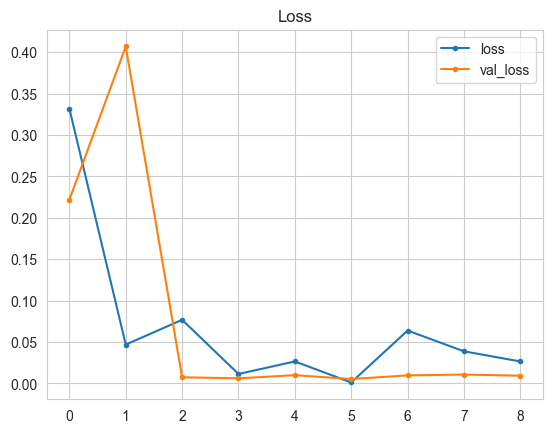

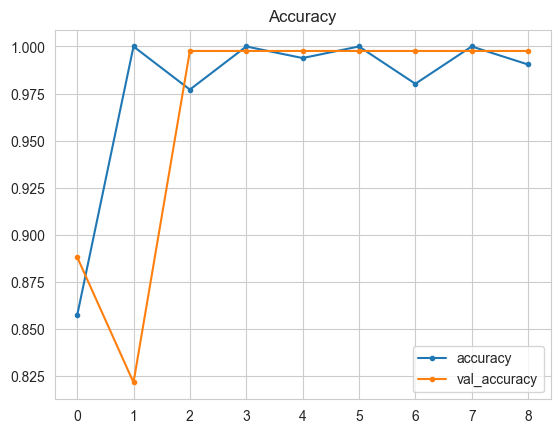

In [64]:
import pandas as pd
import seaborn as sns

losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss', 'val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png',
            bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png',
            bbox_inches='tight', dpi=150)
plt.show()

Model Evaluation

Load saved model

In [65]:
from keras.models import load_model
model = load_model('outputs/v1/cherry_leaf_model.h5')

Evaluate model on test set

In [73]:
import os
test_path = os.path.abspath("../inputs/cherry-leaves_dataset/cherry-leaves/test")
print(test_path)

c:\python_projects\project_5\inputs\cherry-leaves_dataset\cherry-leaves\test


In [86]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_dataset = test_datagen.flow_from_directory(
    "c:\\python_projects\\project_5\\inputs\\cherry-leaves_dataset\\cherry-leaves\\test",
    
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)
evaluation = model.evaluate(test_dataset)

Found 844 images belonging to 2 classes.


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_2" is incompatible with the layer: expected axis -1 of input shape to have value 57600, but received input with shape (None, 12544)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 128, 128, 3), dtype=float32)
  • training=False
  • mask=None

In [82]:
print(model.input_shape)

(None, 256, 256, 3)


In [80]:
test_dataset = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 844 images belonging to 2 classes.


In [78]:
evaluation = model.evaluate(test_dataset)

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_2" is incompatible with the layer: expected axis -1 of input shape to have value 57600, but received input with shape (None, 43264)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 224, 224, 3), dtype=float32)
  • training=False
  • mask=None

In [ ]:
#test_set = test_set.batch(32)
#evaluation = model.evaluate(test_set)
#evaluation = model.evaluate(test_set)


NameError: name 'test_dataset' is not defined

Save evaluation pickle

In [ ]:
joblib.dump(value=evaluation,
            filename=f"outputs/v1/evaluation.pkl")

['outputs/v1/evaluation.pkl']

Predict on new data

Load a random image as PIL

Image shape: (256, 256), Image mode: RGB


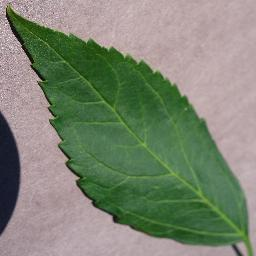

In [87]:
from tensorflow.keras.preprocessing import image

pointer = 66
label = labels[0]  # select Healthy or powdery_mildew

pil_image = image.load_img(test_path + '/' + label + '/' + os.listdir(test_path+'/' + label)[pointer],
                        target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

Convert image to array and prepare for prediction

In [88]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

(1, 256, 256, 3)


Predict class probabilities

In [89]:
pred_proba = model.predict(my_image)[0, 0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class = target_map[pred_proba > 0.5]

if pred_class == target_map[0]:
    pred_proba = 1 - pred_proba

print(pred_proba)
print(pred_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
0.99983877
healthy


In [90]:
!cat .gitignore

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [91]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Modelling and Evaluating.ipynb
	modified:   ../src/machine_learning/predictive_analysis.py
	deleted:    ../venv/Lib/site-packages/pip-25.0.1.dist-info/AUTHORS.txt
	deleted:    ../venv/Lib/site-packages/pip-25.0.1.dist-info/INSTALLER
	deleted:    ../venv/Lib/site-packages/pip-25.0.1.dist-info/LICENSE.txt
	deleted:    ../venv/Lib/site-packages/pip-25.0.1.dist-info/METADATA
	deleted:    ../venv/Lib/site-packages/pip-25.0.1.dist-info/RECORD
	deleted:    ../venv/Lib/site-packages/pip-25.0.1.dist-info/REQUESTED
	deleted:    ../venv/Lib/site-packages/pip-25.0.1.dist-info/WHEEL
	deleted:    ../venv/Lib/site-packages/pip-25.0.1.dist-info/entry_points.txt
	deleted:    ../venv/Lib/site-packages/pip-25.0.1.dist-info/top_level.txt
	modified:   ../venv/Lib/site-

In [92]:
!git add .

In [93]:
!git commit -am " Added model and  new plots "

[main 70c3a360]  Added model and  new plots
 162 files changed, 2906 insertions(+), 8034 deletions(-)
 create mode 100644 jupyter_notebooks/outputs/v1/cherry_leaf_model.h5
 create mode 100644 jupyter_notebooks/outputs/v1/class_indices.pkl
 create mode 100644 jupyter_notebooks/outputs/v1/labels_distribution.png
 create mode 100644 jupyter_notebooks/outputs/v1/model_training_acc.png
 create mode 100644 jupyter_notebooks/outputs/v1/model_training_losses.png
 create mode 100644 jupyter_notebooks/outputs/v1/my_model.keras
 delete mode 100644 venv/Lib/site-packages/pip-25.0.1.dist-info/AUTHORS.txt
 delete mode 100644 venv/Lib/site-packages/pip-25.0.1.dist-info/INSTALLER
 delete mode 100644 venv/Lib/site-packages/pip-25.0.1.dist-info/LICENSE.txt
 delete mode 100644 venv/Lib/site-packages/pip-25.0.1.dist-info/METADATA
 delete mode 100644 venv/Lib/site-packages/pip-25.0.1.dist-info/RECORD
 delete mode 100644 venv/Lib/site-packages/pip-25.0.1.dist-info/REQUESTED
 delete mode 100644 venv/Lib/site

In [94]:
!git push

bash: line 1: /dev/tty: No such device or address
error: failed to execute prompt script (exit code 1)
fatal: could not read Username for 'https://github.com': No such file or directory
